In [3]:
# linear algebra
import numpy as np 

# data processing
import pandas as pd 

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

In [4]:
# READ DATASET

hdata = pd.read_csv(r"C:\Users\A K SHARMA\Downloads\hotel_bookings.csv",encoding='utf8')

In [5]:
hdata.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [6]:
# REPLACE MISSING VALUES BY INTERPOLATION

hdata.interpolate(method ='linear', limit_direction ='forward') 

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,485.0,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,485.0,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,485.0,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,485.0,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [7]:
# CHECK NO OF NULL VALUES IN EACH COLUMN

hdata.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [8]:
# FILL NULL VALUES BY MEAN AND MEDIAN 

hdata['agent']=hdata['agent'].fillna(hdata['agent'].mean())

In [9]:
hdata['company']=hdata['company'].fillna(hdata['company'].median())

In [10]:
hdata.isnull().sum()

hotel                               0
is_canceled                         0
lead_time                           0
arrival_date_year                   0
arrival_date_month                  0
arrival_date_week_number            0
arrival_date_day_of_month           0
stays_in_weekend_nights             0
stays_in_week_nights                0
adults                              0
children                            4
babies                              0
meal                                0
country                           488
market_segment                      0
distribution_channel                0
is_repeated_guest                   0
previous_cancellations              0
previous_bookings_not_canceled      0
reserved_room_type                  0
assigned_room_type                  0
booking_changes                     0
deposit_type                        0
agent                               0
company                             0
days_in_waiting_list                0
customer_typ

In [11]:
# SPLIT DATA INTO TRAINING AND TESTING DATA

X = hdata.drop(columns=['is_canceled'],axis=1)
Y = hdata['is_canceled']

In [12]:
hdata.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,86.693382,179.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,86.693382,179.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,86.693382,179.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.000000,179.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.000000,179.0,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [13]:
# LABEL ENCODING TO CONVERT CATEOGORICAL VARIABLES TO NUMERIC 

from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'. 
X['hotel']= label_encoder.fit_transform(X['hotel']) 

X['arrival_date_month']= label_encoder.fit_transform(X['arrival_date_month'])
X['deposit_type']= label_encoder.fit_transform(X['deposit_type'])
X['assigned_room_type']= label_encoder.fit_transform(X['assigned_room_type'])
X['deposit_type']= label_encoder.fit_transform(X['deposit_type'])
X['customer_type']= label_encoder.fit_transform(X['customer_type'])
X['reservation_status']= label_encoder.fit_transform(X['reservation_status'])

X['market_segment']= label_encoder.fit_transform(X['market_segment'])
X['distribution_channel']= label_encoder.fit_transform(X['distribution_channel'])
X['reserved_room_type']= label_encoder.fit_transform(X['reserved_room_type'])



In [14]:
# YOU CAN CHECK UNIQUE VALUES IN EACH COLUMN TO CHECK NAN VALUES

X['meal'].unique()

array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object)

In [15]:
X['country'].unique()

array(['PRT', 'GBR', 'USA', 'ESP', 'IRL', 'FRA', nan, 'ROU', 'NOR', 'OMN',
       'ARG', 'POL', 'DEU', 'BEL', 'CHE', 'CN', 'GRC', 'ITA', 'NLD',
       'DNK', 'RUS', 'SWE', 'AUS', 'EST', 'CZE', 'BRA', 'FIN', 'MOZ',
       'BWA', 'LUX', 'SVN', 'ALB', 'IND', 'CHN', 'MEX', 'MAR', 'UKR',
       'SMR', 'LVA', 'PRI', 'SRB', 'CHL', 'AUT', 'BLR', 'LTU', 'TUR',
       'ZAF', 'AGO', 'ISR', 'CYM', 'ZMB', 'CPV', 'ZWE', 'DZA', 'KOR',
       'CRI', 'HUN', 'ARE', 'TUN', 'JAM', 'HRV', 'HKG', 'IRN', 'GEO',
       'AND', 'GIB', 'URY', 'JEY', 'CAF', 'CYP', 'COL', 'GGY', 'KWT',
       'NGA', 'MDV', 'VEN', 'SVK', 'FJI', 'KAZ', 'PAK', 'IDN', 'LBN',
       'PHL', 'SEN', 'SYC', 'AZE', 'BHR', 'NZL', 'THA', 'DOM', 'MKD',
       'MYS', 'ARM', 'JPN', 'LKA', 'CUB', 'CMR', 'BIH', 'MUS', 'COM',
       'SUR', 'UGA', 'BGR', 'CIV', 'JOR', 'SYR', 'SGP', 'BDI', 'SAU',
       'VNM', 'PLW', 'QAT', 'EGY', 'PER', 'MLT', 'MWI', 'ECU', 'MDG',
       'ISL', 'UZB', 'NPL', 'BHS', 'MAC', 'TGO', 'TWN', 'DJI', 'STP',
       'KNA', 'E

In [16]:
X['country'] = X['country'].astype(str)

In [17]:
X['country'] = label_encoder.fit_transform(X['country'])

In [18]:
X.head(10)

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,1,342,2015,5,27,1,0,0,2,0.0,...,0,86.693382,179.0,0,2,0.0,0,0,1,2015-07-01
1,1,737,2015,5,27,1,0,0,2,0.0,...,0,86.693382,179.0,0,2,0.0,0,0,1,2015-07-01
2,1,7,2015,5,27,1,0,1,1,0.0,...,0,86.693382,179.0,0,2,75.0,0,0,1,2015-07-02
3,1,13,2015,5,27,1,0,1,1,0.0,...,0,304.000000,179.0,0,2,75.0,0,0,1,2015-07-02
4,1,14,2015,5,27,1,0,2,2,0.0,...,0,240.000000,179.0,0,2,98.0,0,1,1,2015-07-03
5,1,14,2015,5,27,1,0,2,2,0.0,...,0,240.000000,179.0,0,2,98.0,0,1,1,2015-07-03
6,1,0,2015,5,27,1,0,2,2,0.0,...,0,86.693382,179.0,0,2,107.0,0,0,1,2015-07-03
7,1,9,2015,5,27,1,0,2,2,0.0,...,0,303.000000,179.0,0,2,103.0,0,1,1,2015-07-03
8,1,85,2015,5,27,1,0,3,2,0.0,...,0,240.000000,179.0,0,2,82.0,0,1,0,2015-05-06
9,1,75,2015,5,27,1,0,3,2,0.0,...,0,15.000000,179.0,0,2,105.5,0,0,0,2015-04-22


In [19]:
X.isna().sum()

hotel                             0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          4
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

In [20]:
X['children']=X['children'].fillna(X['children'].mean())

In [21]:
X.isna().sum()

hotel                             0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

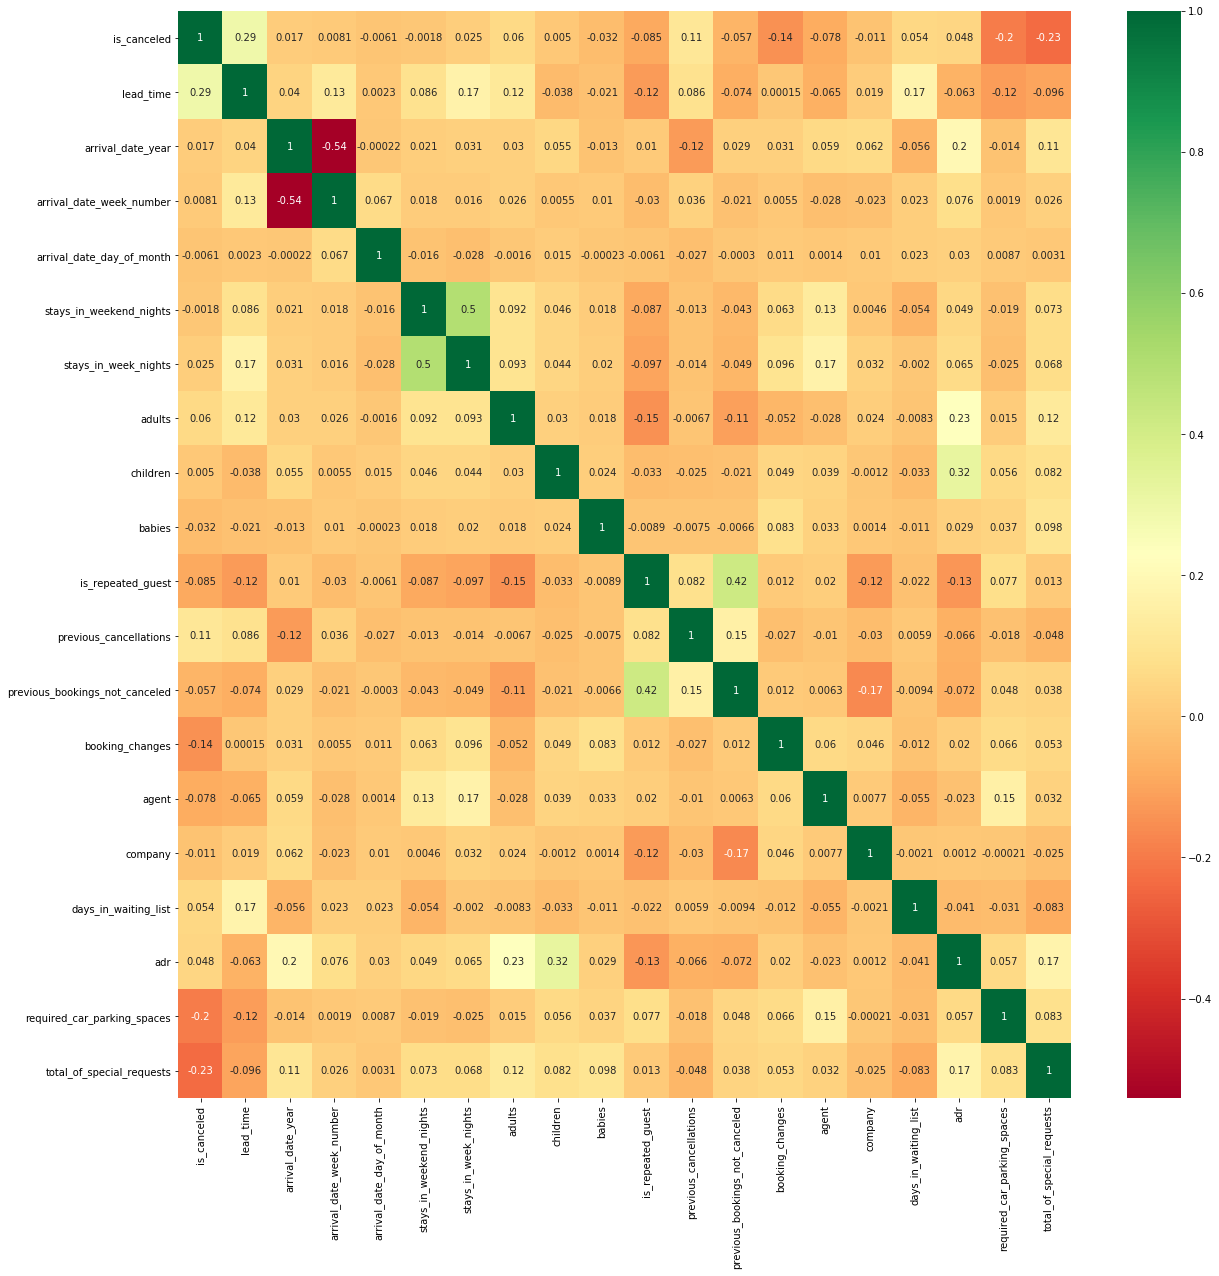

In [22]:
#get correlations of each features in dataset
corrmat = hdata.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(hdata[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [23]:
X.shape

(119390, 31)

In [24]:
E = X[['lead_time','arrival_date_year','arrival_date_week_number','stays_in_weekend_nights','adults','children','previous_cancellations','adr','days_in_waiting_list']]
F = hdata['is_canceled']

In [25]:
from sklearn.model_selection import train_test_split

E_train, E_test, F_train, F_test = train_test_split(E, F, test_size = 0.2, random_state = 10)

In [26]:
# RANDOM FOREST

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(E_train, F_train)

F_pred_RF = random_forest.predict(E_test)

random_forest.score(E_train, F_train)
acc_random_forest = round(random_forest.score(E_train, F_train) * 100, 2)

# LOGISTIC REGRESSION

logreg = LogisticRegression()
logreg.fit(E_train, F_train)

F_pred_LR = logreg.predict(E_test)

acc_log = round(logreg.score(E_train, F_train) * 100, 2)

# K NEAREST NEIGHBOURS

knn = KNeighborsClassifier(n_neighbors = 3) 
knn.fit(E_train, F_train) 
F_pred_KNN = knn.predict(E_test)  
acc_knn = round(knn.score(E_train, F_train) * 100, 2)

# GAUSSIAN NAIVE BAYES

gaussian = GaussianNB()
gaussian.fit(E_train, F_train) 
F_pred_NB = gaussian.predict(E_test)  
acc_gaussian = round(gaussian.score(E_train, F_train) * 100, 2)

#Linear Support Vector Machine:

linear_svc = LinearSVC()
linear_svc.fit(E_train, F_train)

F_pred_SVM = linear_svc.predict(E_test)

acc_linear_svc = round(linear_svc.score(E_train, F_train) * 100, 2)

# Decision Tree
decision_tree = DecisionTreeClassifier() 
decision_tree.fit(E_train, F_train)  
F_pred_DT = decision_tree.predict(E_test)  
acc_decision_tree = round(decision_tree.score(E_train, F_train) * 100, 2)


C:\Users\A K SHARMA\Videos\PYTHON\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\A K SHARMA\Videos\PYTHON\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [28]:
# PRINT THE ACCURACY OF EACH ALGORITHM IN  A TABULAR FORMAT

results = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes','Decision Tree'],
    'Score': [acc_linear_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian,acc_decision_tree]}
)
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
98.13,Random Forest
98.13,Decision Tree
87.02,KNN
68.16,Naive Bayes
67.95,Logistic Regression
63.09,Support Vector Machines
